In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from modules.summarizing_utils import *

In [2]:
img_list = get_img_list(img_dir = 'figs/mnistv6', mode='lowest_loss')

1/1512 : figs/mnistv6/img_size(128)@T(1)@rotation_lambda(10.0)@lr_H(0.0)@lambda_scale_factor(1)/150_L1Loss(0.065).jpg
101/1512 : figs/mnistv6/img_size(128)@T(16)@rotation_lambda(10.0)@lr_H(0.1)@lambda_scale_factor(1)/150_L1Loss(0.029).jpg
201/1512 : figs/mnistv6/img_size(128)@T(2)@rotation_lambda(100.0)@lr_H(0.0001)@lambda_scale_factor(1)/150_L1Loss(0.023).jpg
301/1512 : figs/mnistv6/img_size(128)@T(32)@rotation_lambda(100.0)@lr_H(1.0)@lambda_scale_factor(1)/150_L1Loss(0.015).jpg
401/1512 : figs/mnistv6/img_size(128)@T(4)@rotation_lambda(1000.0)@lr_H(0.001)@lambda_scale_factor(1)/150_L1Loss(0.018).jpg
501/1512 : figs/mnistv6/img_size(128)@T(8)@rotation_lambda(1000.0)@lr_H(10.0)@lambda_scale_factor(1)/145_L1Loss(0.015).jpg
601/1512 : figs/mnistv6/img_size(32)@T(16)@rotation_lambda(10.0)@lr_H(0.01)@lambda_scale_factor(1)/150_L1Loss(0.029).jpg
701/1512 : figs/mnistv6/img_size(32)@T(2)@rotation_lambda(100.0)@lr_H(0.0)@lambda_scale_factor(1)/150_L1Loss(0.026).jpg
801/1512 : figs/mnistv6/img

# HEAT MAPS

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
def imgdir2metric(imgdir):
    metric = float(imgdir.split('(')[-1][:-5])
    return metric

def create_metric_map(dict_, lambda_scale_factor=1, img_size=32):
    dict_['lambda_scale_factor']= [str(lambda_scale_factor)]
    dict_['img_size']= [str(img_size)]
    
    interested_imgs = filter_results(dict_, img_list)

    Ts= sorted(dict_['T'], key =float)
    rotation_lambdas = sorted(dict_['rotation_lambda'], key= float)
    
    metric_map = np.ones((len(Ts),len(rotation_lambdas)), dtype='float')
    for i in range(len(Ts)):
        T= Ts[i]
        for j in range(len(rotation_lambdas)):
            rotation_lambda= rotation_lambdas[j]

            valid_img_dirs=[]
            for img_dir in interested_imgs:
                if f'T({T})' in img_dir and f'rotation_lambda({rotation_lambda})' in img_dir:valid_img_dirs.append(img_dir)


            sorted_valid_img_dirs= sorted(valid_img_dirs, key= imgdir2metric)
            selected_img_dir = sorted_valid_img_dirs[0]

            metric_value = imgdir2metric(selected_img_dir)
            metric_map[i, j]= metric_value
                
    return metric_map, Ts, rotation_lambdas



In [5]:
attr_dict_highlrH = {
         'lr_H': ['0.0001', '0.001', '0.01', '0.1', '1.0', '10.0'],
         'T': ['1', '16', '2', '32', '4', '8'],
         'rotation_lambda': ['10.0', '100.0', '1000.0']}

attr_dict_lowlrH = {
         'lr_H': ['0.0'],
         'T': ['1', '16', '2', '32', '4', '8'],
         'rotation_lambda': ['10.0', '100.0', '1000.0']}


lambda_scale_factor=4
img_size=128

map_highlrH, xticks_highlrH, yticks_highlrH = create_metric_map(attr_dict_highlrH, lambda_scale_factor=lambda_scale_factor, img_size= img_size)
map_lowlrH, xticks_lowlrH, yticks_lowlrH = create_metric_map(attr_dict_lowlrH, lambda_scale_factor=lambda_scale_factor, img_size= img_size)

vmin = min(map_highlrH.min(), map_lowlrH.min())
vmax =  max(map_highlrH.max(), map_lowlrH.max())


metric_map_highlrH= map_highlrH
metric_map_lowlrH= map_lowlrH
x_ticks= xticks_highlrH
y_ticks= yticks_highlrH


108 images are found !!!
18 images are found !!!


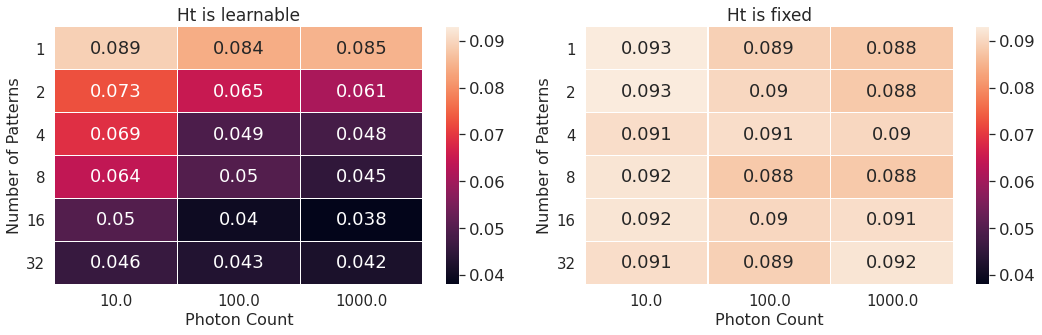

In [15]:
tick_fontsize= 15
label_fontsize= 16
title_fontsize= 17
heatmap_fontscale=1.5

sns.set(font_scale=1.0*heatmap_fontscale)

plt.figure(figsize= (15,5))
plt.subplot(1,2,1)
ax = sns.heatmap(metric_map_highlrH, linewidth=0.5, annot=True, vmin=vmin, vmax= vmax)
plt.xticks(np.arange(len(y_ticks))+0.5, y_ticks, rotation=0, fontsize=tick_fontsize)
plt.xlabel('Photon Count', fontsize= label_fontsize)
plt.yticks(np.arange(len(x_ticks))+0.5, x_ticks, rotation=0, fontsize=tick_fontsize)
plt.ylabel('Number of Patterns', fontsize= label_fontsize)
plt.title('Ht is learnable', fontsize= title_fontsize, y=1.)

plt.subplot(1,2,2)
ax = sns.heatmap(metric_map_lowlrH, linewidth=0.5, annot=True, vmin=vmin, vmax= vmax)
plt.xticks(np.arange(len(y_ticks))+0.5, y_ticks, rotation=0, fontsize=tick_fontsize)
plt.xlabel('Photon Count', fontsize= label_fontsize)
plt.yticks(np.arange(len(x_ticks))+0.5, x_ticks, rotation=0, fontsize=tick_fontsize)
plt.ylabel('Number of Patterns', fontsize= label_fontsize)
plt.title('Ht is fixed', fontsize= title_fontsize, y=1.)

plt.savefig('figures_to_poster/heatmaps.pdf', dpi= 1000, format='pdf')
plt.tight_layout()

plt.show()